<a href="https://colab.research.google.com/github/utkarsh-G-23/cvlab-tues/blob/main/lab1/e22cseu1396/lab5_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import tensorflow as tf

# Task 1.1: Lossy Compression (JPEG)
image_path = "/content/Lena_Image.png"
image = cv2.imread(image_path)
cv2.imwrite("/content/Lena_compressed_lossy.jpg", image, [int(cv2.IMWRITE_JPEG_QUALITY), 50])

# Task 1.2: Lossless Compression (PNG)
cv2.imwrite("/content/Lena_compressed_losssless.png", image, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])





True

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.9124 - loss: 0.2845 - val_accuracy: 0.9816 - val_loss: 0.0547
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9869 - loss: 0.0418 - val_accuracy: 0.9889 - val_loss: 0.0309
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9911 - loss: 0.0290 - val_accuracy: 0.9884 - val_loss: 0.0355
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9942 - loss: 0.0181 - val_accuracy: 0.9912 - val_loss: 0.0293
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 35ms/step - accuracy: 0.9956 - loss: 0.0140 - val_accuracy: 0.9901 - val_loss: 0.0308
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9966 - loss: 0.0108 - val_accuracy: 0.9902 - val_loss: 0.0318
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 36ms/step - accuracy: 0.9973 - loss: 0.0094 - val_accuracy: 0.9909 - val_loss: 0.0321
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 38ms/step - accuracy: 0.9975 -

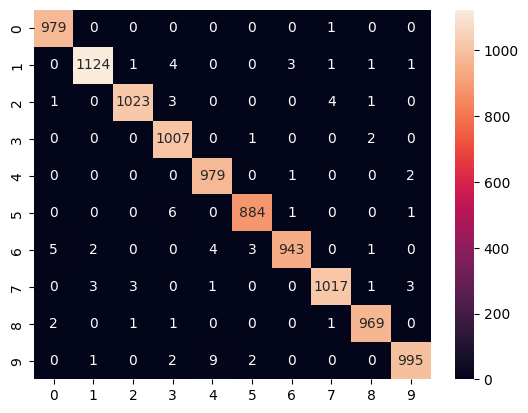

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


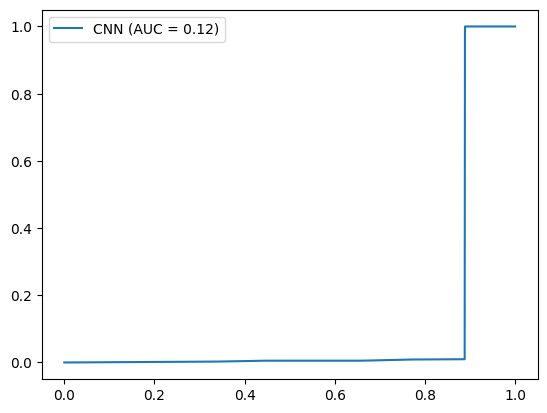

In [4]:
# Task 2.1: CNN on MNIST
def train_mnist():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

    y_pred = model.predict(x_test).argmax(axis=1)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, model.predict(x_test).argmax(axis=1), pos_label=1)
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f})'.format(auc(fpr, tpr)))
    plt.legend()
    plt.show()

train_mnist()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.4216 - loss: 1.6022 - val_accuracy: 0.5992 - val_loss: 1.1298
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6192 - loss: 1.0812 - val_accuracy: 0.6324 - val_loss: 1.0603
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.6830 - loss: 0.9048 - val_accuracy: 0.6765 - val_loss: 0.9383
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.7276 - loss: 0.7851 - val_accuracy: 0.6862 - val_loss: 0.9132
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.7578 - loss: 0.7024 - val_accuracy: 0.6979 - val_loss: 0.9010
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 48ms/step - accuracy: 0.7858 - loss: 0.6195 - val_accuracy: 0.6954 - val_loss: 0.9261
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 54ms/step - accuracy: 0.8164 - loss: 0.5268 - val_accuracy: 0.7075 - val_loss: 0.9104
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 49ms/step - accuracy: 0.8366

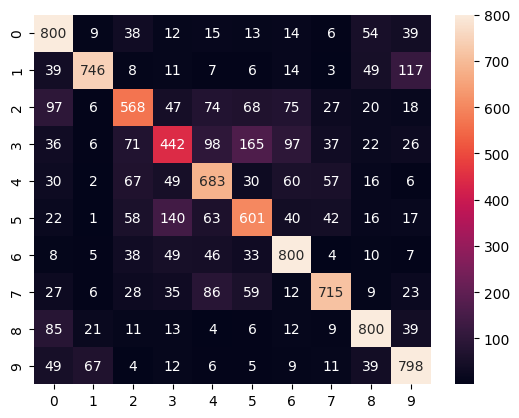

In [5]:

# Task 2.2: CNN on CIFAR-10
def train_cifar10():
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0

    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

    y_pred = model.predict(x_test).argmax(axis=1)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

train_cifar10()

In [ ]:
def train_cifar10():
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

    x_train, x_test = x_train / 255.0, x_test / 255.0

    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.4),

        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test))

    y_pred = model.predict(x_test).argmax(axis=1)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    return history, model

history, model = train_cifar10()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 525s 662ms/step - accuracy: 0.3800 - loss: 1.7041 - val_accuracy: 0.5988 - val_loss: 1.1301
Epoch 2/30
179/782 ━━━━━━━━━━━━━━━━━━━━ 6:16 625ms/step - accuracy: 0.6017 - loss: 1.1019